<h1 style = "font-family: Comic Sans MS	">  Importing Libraries</h1>

In [47]:
import warnings 
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

<h1 style = "font-family: Comic Sans MS	">  Load the dataset</h1>

In [48]:
df = pd.read_csv('survey.csv', parse_dates=['Timestamp'])
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [49]:
# get the columns of the dataframe

df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

<h3 style = "font-family: Comic Sans MS	"> Understanding the Columns: </h3>

* **Timestamp** the time of recording
* **Age**   the age of the respondant
* **Gender**    the Gender of the respondant
* **Country**   Location
* **state:** If you live in the United States, which state or territory do you live in?
* **self_employed:** Are you self-employed?
* **family_history:** Do you have a family history of mental illness?
* **treatment:** Have you sought treatment for a mental health condition?
* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
* **no_employees:** How many employees does your company or organization have?
* **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
* **tech_company:** Is your employer primarily a tech company/organization?
* **benefits:** Does your employer provide mental health benefits?
* **care_options:** Do you know the options for mental health care your employer provides?
* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave:** How easy is it for you to take medical leave for a mental health condition?
* **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
* **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
* **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?
* **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?
* **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* **comments:** Any additional notes or comments

In [50]:
# get the shape of the dataframe
df.shape

(1259, 27)

In [51]:
# get the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      744 non-null    object        
 5   self_employed              1241 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             995 non-null    object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

In [52]:
# check for the null values

df.isnull().sum()   

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Important Inferences:

* The dataset contains a total of **26** columns.
* Except for the age column, all other columns are of object datatype.
* The comment column has the highest number of null values, accounting for **70%**. This is understandable as it was an optional text box, and many respondents likely left it blank.
* We will drop the timestamp column since it contains the date, month, year, and time when the respondent completed the questionnaire, which is not relevant to our analysis.
* The state column also has a significant number of null values, which requires further investigation.

In [53]:
print("The different gender notations used in our dataset are: \n")
print(df['Gender'].unique())

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


- there are many genders that are same but differently categorized.
* Male, or cis Male, means born as male and decide to be male.
* Female, or cis Female, means born as female and decide to be female.
* Other, is a word that describes sexual and gender identities other than straight and cisgender. Lesbian, gay, bisexual, and transgender people may all identify with the word other.

In [54]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Gender
Male      991
Female    247
Other      21
Name: count, dtype: int64

In [55]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [56]:
df.isnull().sum()   

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                263
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1091
dtype: int64

In [57]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [58]:
df.work_interfere.value_counts()

work_interfere
Sometimes    464
Never        213
Rarely       173
Often        141
Name: count, dtype: int64

In [59]:
df.work_interfere.fillna('Don\'t know', inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             1254 non-null   object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

In [61]:
df.treatment.value_counts()

treatment
Yes    633
No     621
Name: count, dtype: int64

* As Far as the Target variable is concerned the dataset is balanced

<h1 style = "font-family: Comic Sans MS	">  Analysis</h1>

<Figure size 1200x800 with 0 Axes>

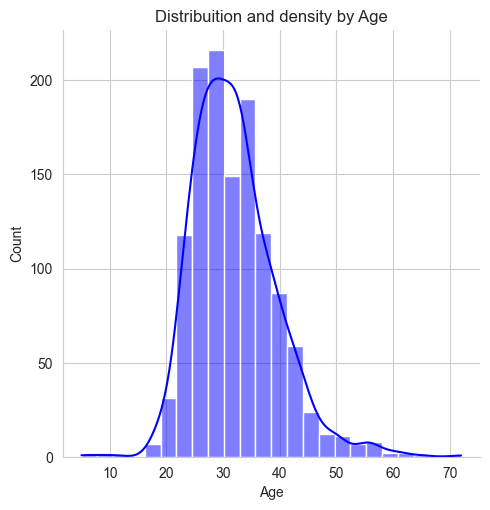

In [62]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
# add curve into the distribution
sns.displot(df["Age"], bins=24, color='b', kde=True)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

- The Age Column is normally disributed

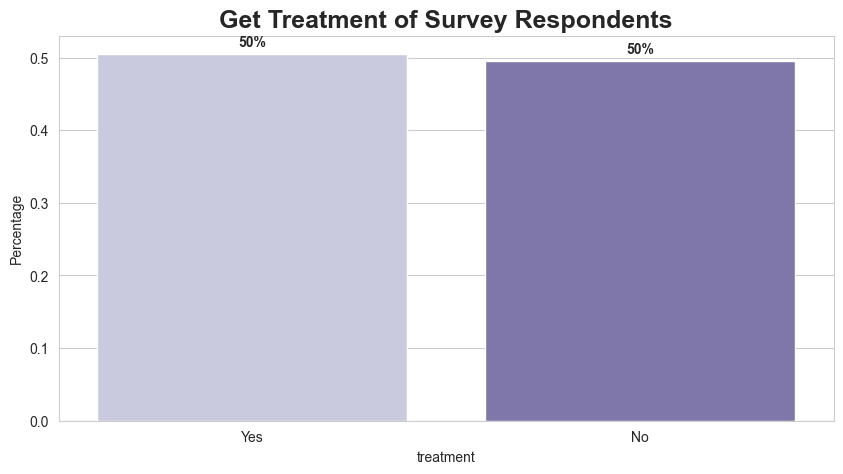

In [63]:
# sns.set_style("whitegrid")
plt.figure(figsize = (10,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')


This is our target variable.
Looking at the first graph, we see that the percentage of respondents who want to get treatment is exactly 50%. Workplaces that promote mental health and support people with mental disorders are more likely to  have increased productivity, reduce absenteeism, and benefit from associated economic gains. If employees enjoy good mental health, employees can:

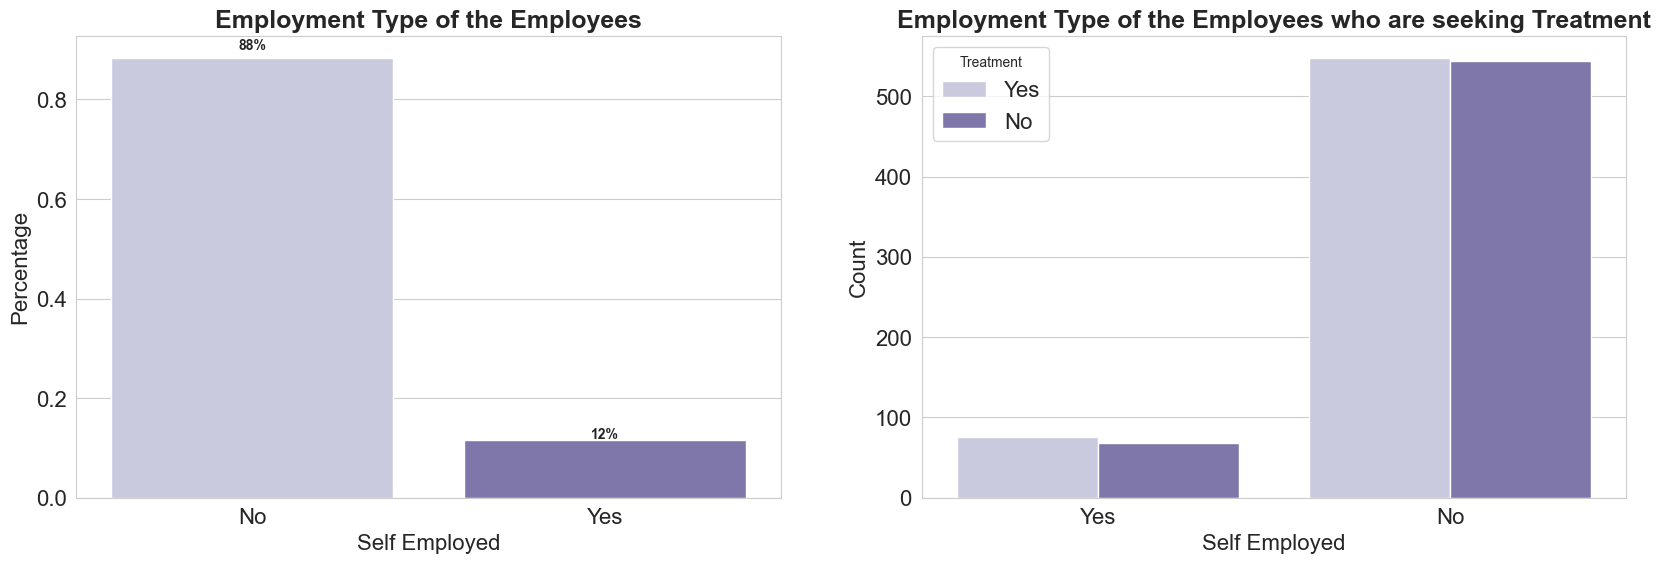

In [64]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['self_employed'].value_counts(normalize=True).rename_axis('self_employed').reset_index(name='Percentage')
ax = sns.barplot(x='self_employed', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Employment Type of the Employees', fontsize=18, fontweight='bold')
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette='Purples')
plt.title('Employment Type of the Employees who are seeking Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.show()

- Most of the respondants are not self Employed however the trend to get treatment not differ significantly


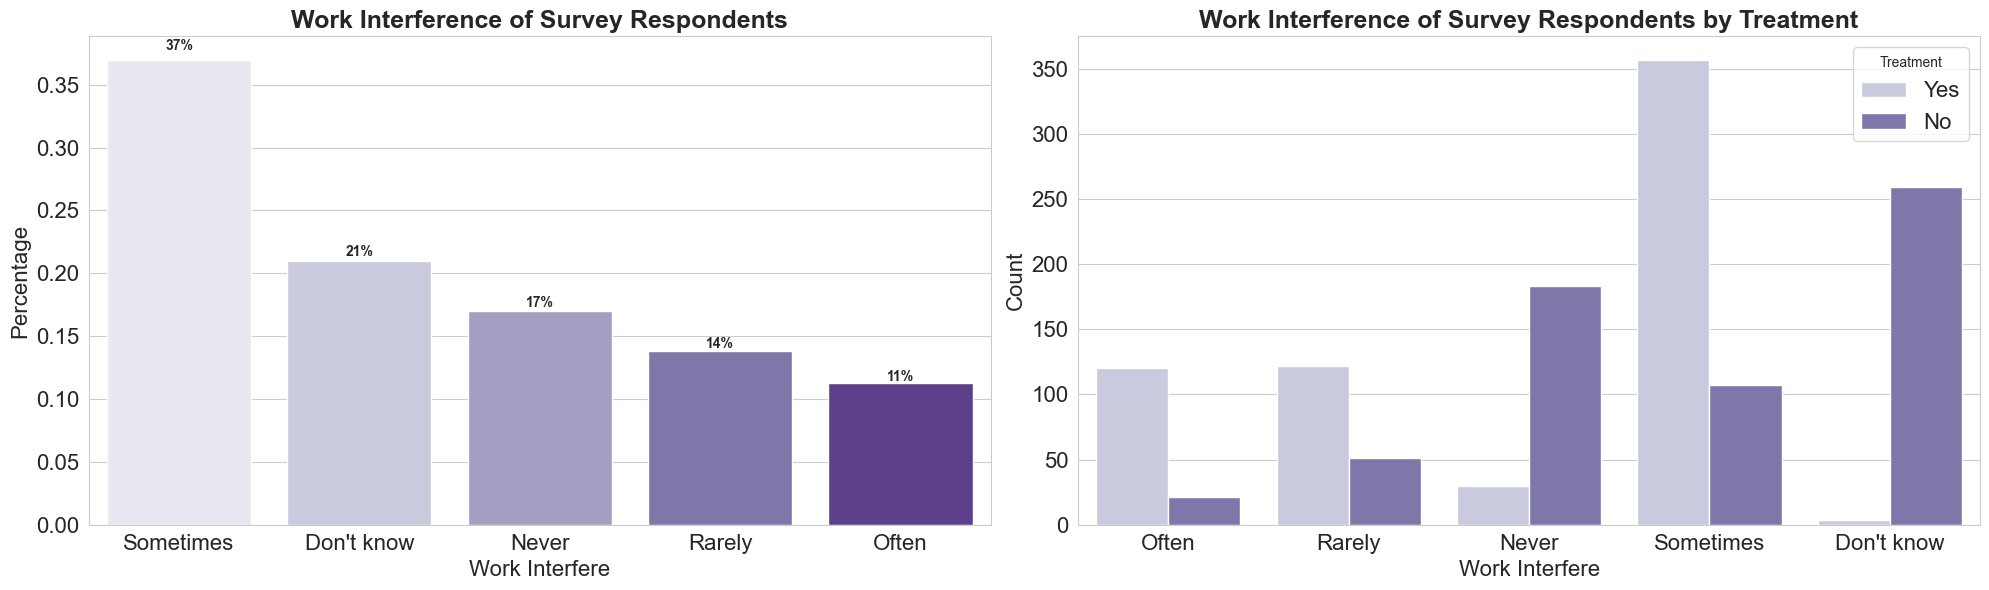

In [65]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['work_interfere'].value_counts(normalize=True).rename_axis('work_interfere').reset_index(name='Percentage')
ax = sns.barplot(x='work_interfere', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Work Interfere', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', hue='treatment', data=df, palette='Purples')
plt.title('Work Interference of Survey Respondents by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Work Interfere', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

* On seeing the first graph we conclude that around 37% of people say that sometimes work interefers with their mental health. Now **'Sometimes'** is a really vague response to a question, and more often than not these are the people who actually face a condition but are too shy/reluctant to choose the extreme category.
* Coming to our second graph, we see that the people who chose **'Sometimes'** had the highest number of people who actually had a mental condition. Similar pattern was shown for the people who belonged to the **'Often category'*.
* But what is more surprising to know is that even for people whose mental health **'Never'** has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the worker.

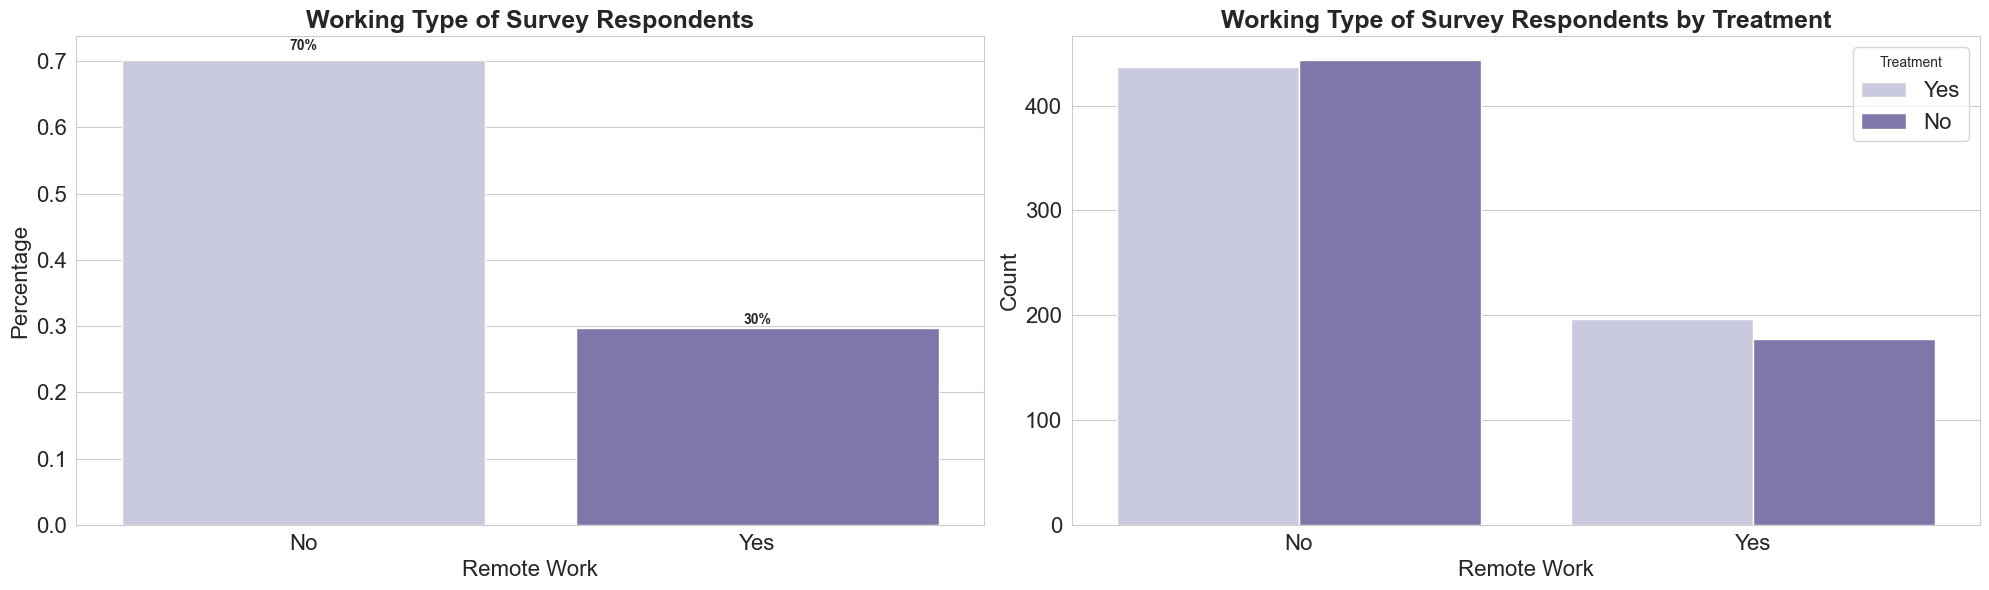

In [66]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['remote_work'].value_counts(normalize=True).rename_axis('remote_work').reset_index(name='Percentage')
ax = sns.barplot(x='remote_work', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Remote Work', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='remote_work', hue='treatment', data=df, palette='Purples')
plt.title('Working Type of Survey Respondents by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Remote Work', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

This was the respondent's answer to the question, **'Do you work remotely (outside of an office) at least 50% of the time?'.**

Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace. On the other side, it has slightly different between an employee that want to get treatment and don't want to get a treatment. 
The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable. 

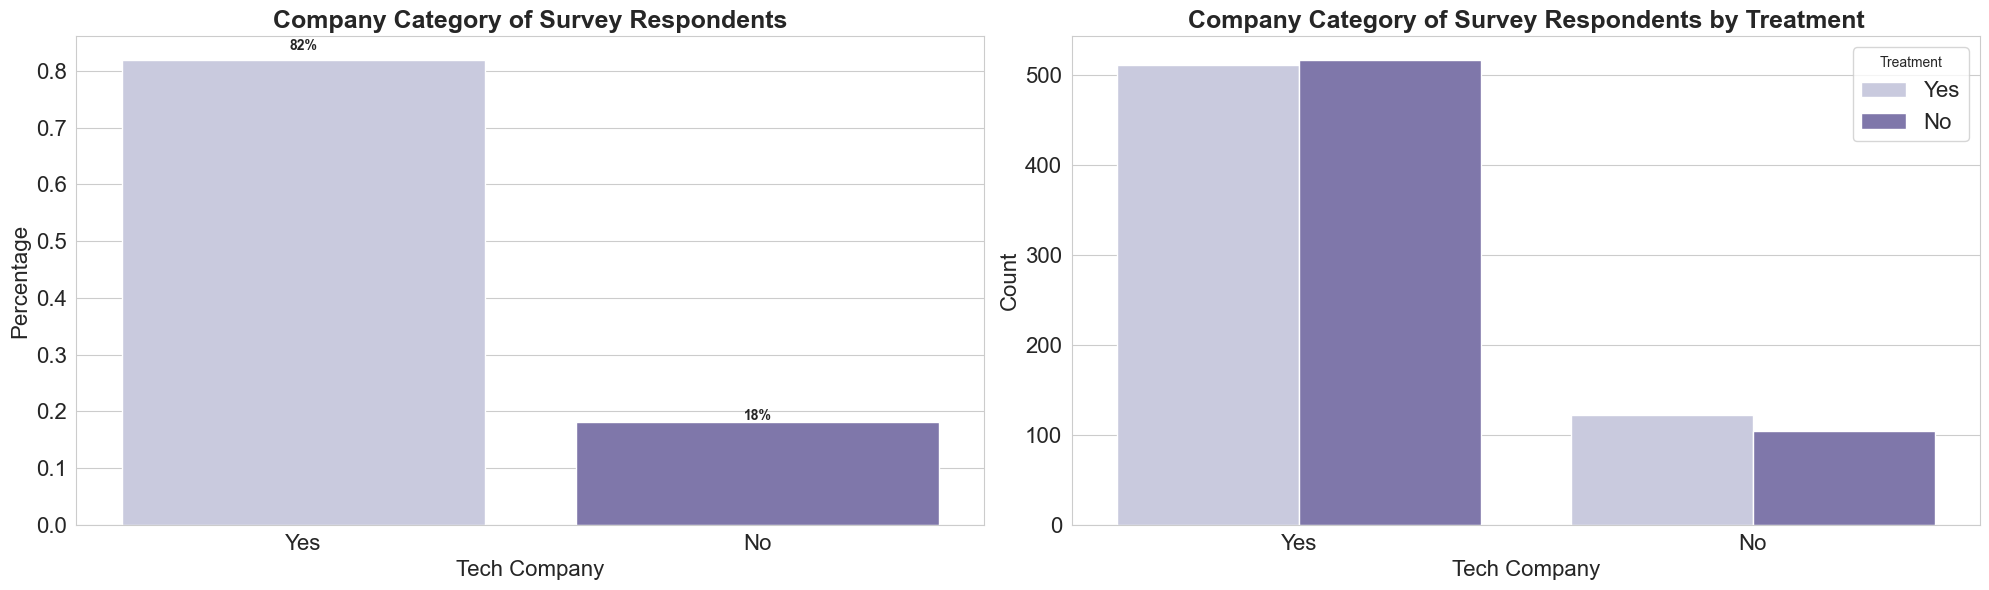

In [67]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
ax = sns.barplot(x='tech_company', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Tech Company', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='tech_company', hue='treatment', data=df, palette='Purples')
plt.title('Company Category of Survey Respondents by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Tech Company', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

* Although the survey was specifically designed to be conducted in the tech field, there are close to 18% of the companies belonginf to the non tech field. However, looking at the second graph, one may conclude that whether a person belongs to the tech field or not, mental health still becomes a big problem.

* However, on a deeper look we find that the number of employees in the tech sector who want to get treatment is slightly lower than the one's who don't. But in the non-tech field the situation gets reversed.

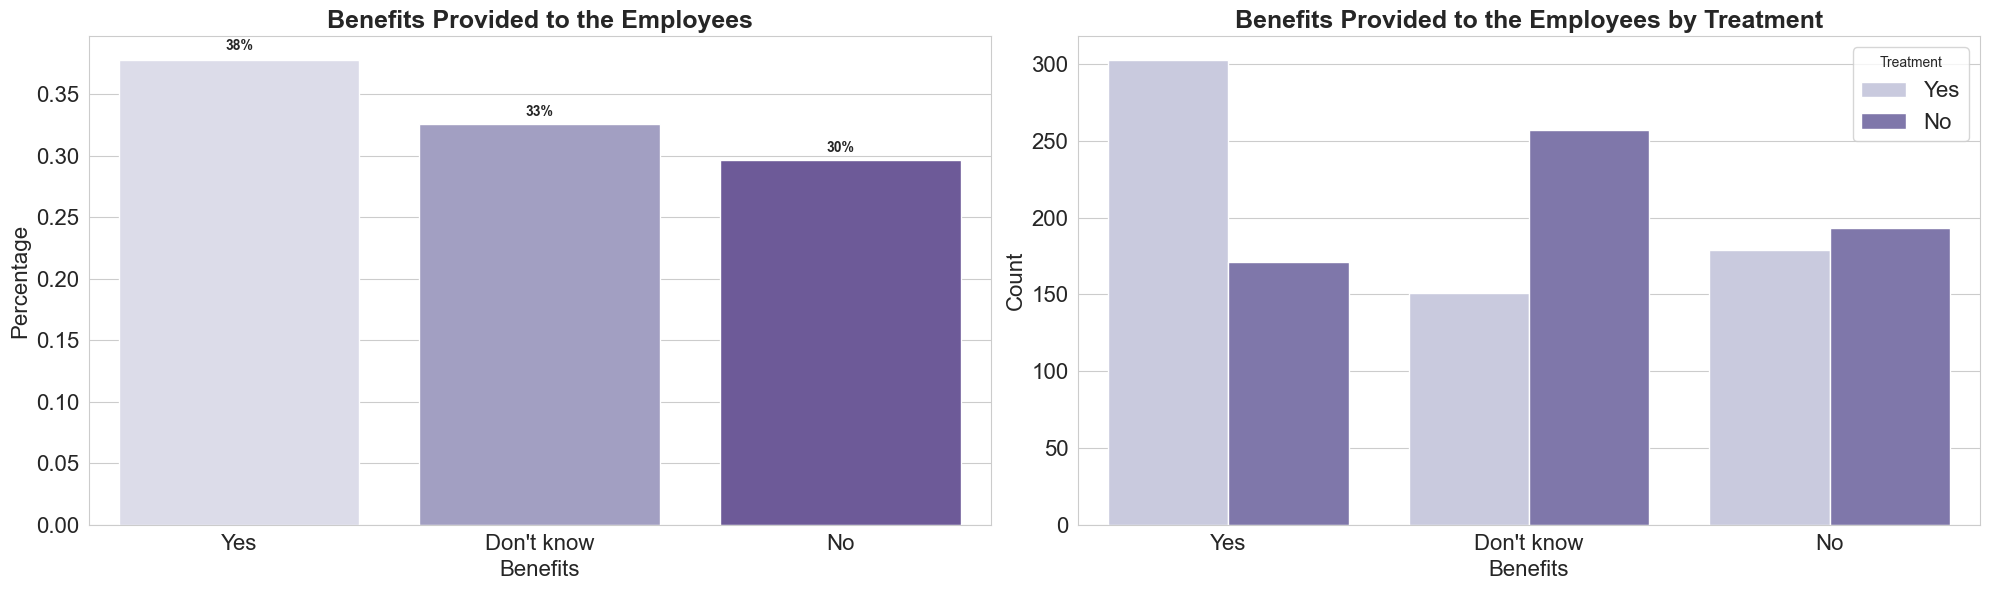

In [68]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['benefits'].value_counts(normalize=True).rename_axis('benefits').reset_index(name='Percentage')
ax = sns.barplot(x='benefits', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Benefits Provided to the Employees', fontsize=18, fontweight='bold')
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='benefits', hue='treatment', data=df, palette='Purples')
plt.title('Benefits Provided to the Employees by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

* We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
* Coming to the second graph, we see that for the people who **YES** said to mental health benefits, around 63% of them said that they were seeking medical help. 
* Surprisingly, the people who said **NO** for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.   

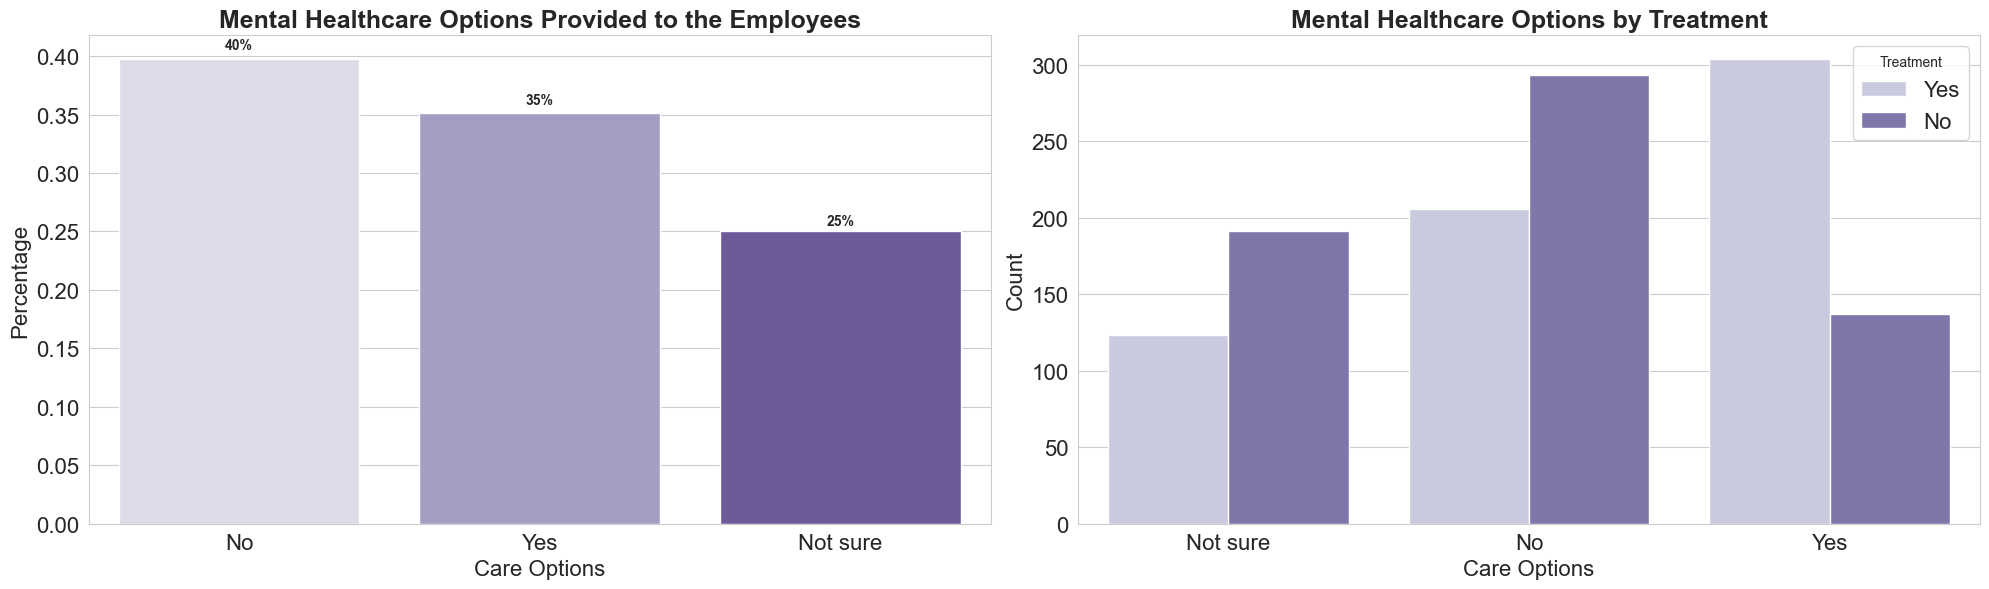

In [69]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['care_options'].value_counts(normalize=True).rename_axis('care_options').reset_index(name='Percentage')
ax = sns.barplot(x='care_options', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare Options Provided to the Employees', fontsize=18, fontweight='bold')
plt.xlabel('Care Options', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='care_options', hue='treatment', data=df, palette='Purples')
plt.title('Mental Healthcare Options by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Care Options', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

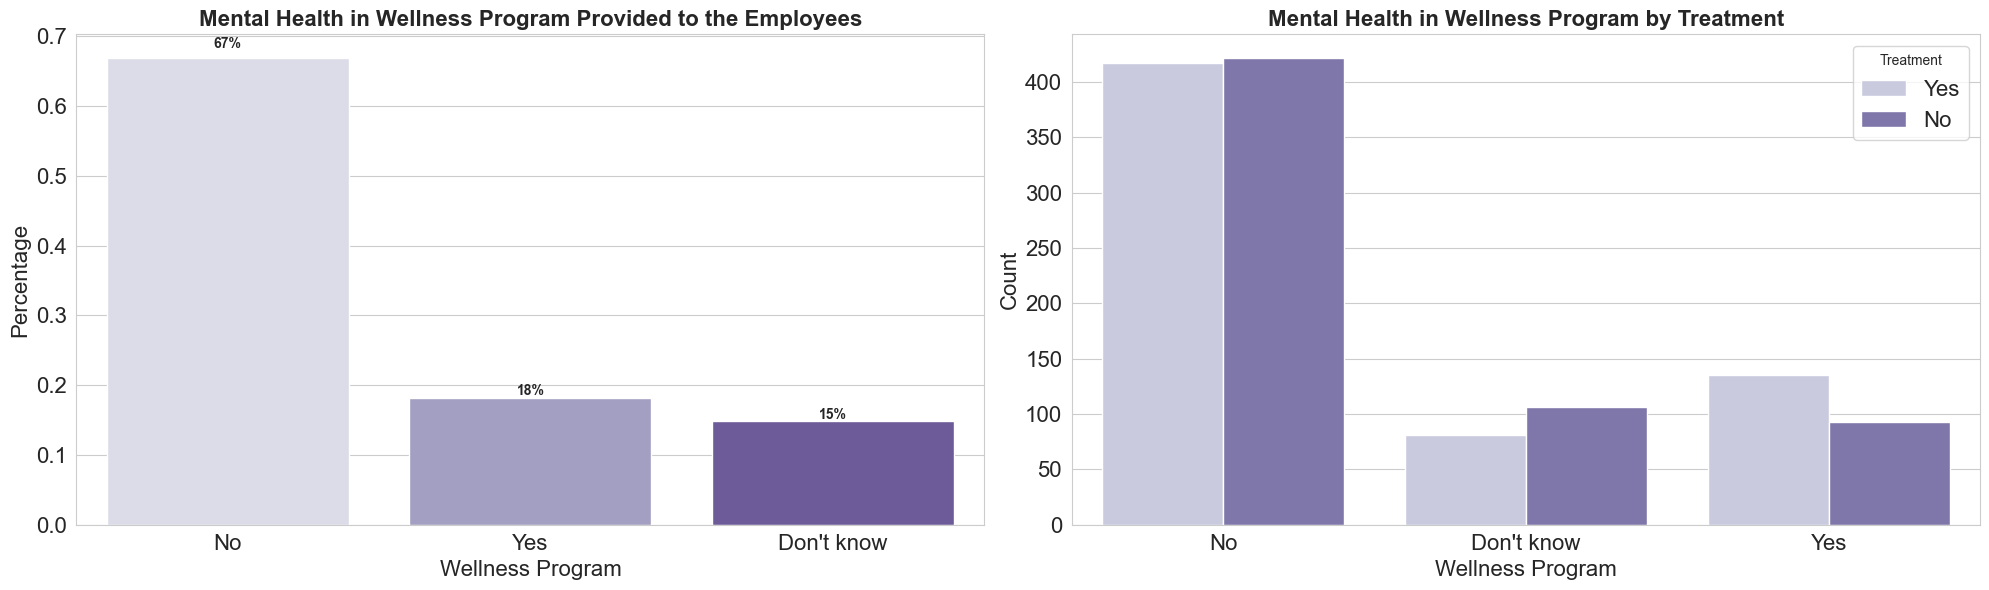

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['wellness_program'].value_counts(normalize=True).rename_axis('wellness_program').reset_index(name='Percentage')
ax = sns.barplot(x='wellness_program', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program Provided to the Employees', fontsize=16, fontweight='bold')
plt.xlabel('Wellness Program', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='wellness_program', hue='treatment', data=df, palette='Purples')
plt.title('Mental Health in Wellness Program by Treatment', fontsize=16, fontweight='bold')
plt.xlabel('Wellness Program', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()


**'Has your employer ever discussed mental health as part of an employee wellness program?'.**

* About 19% of the repondents say **YES** about becoming a part of the employee wellness program and out of those 60% of employee want to get treatment. 
* One shocking revealation is that more than 65% of respondents say that there aren't any wellness programs provided by their company. But close to half of those respondents want to get treatment, which means the company needs to fulfil its duty and provide it soon. 

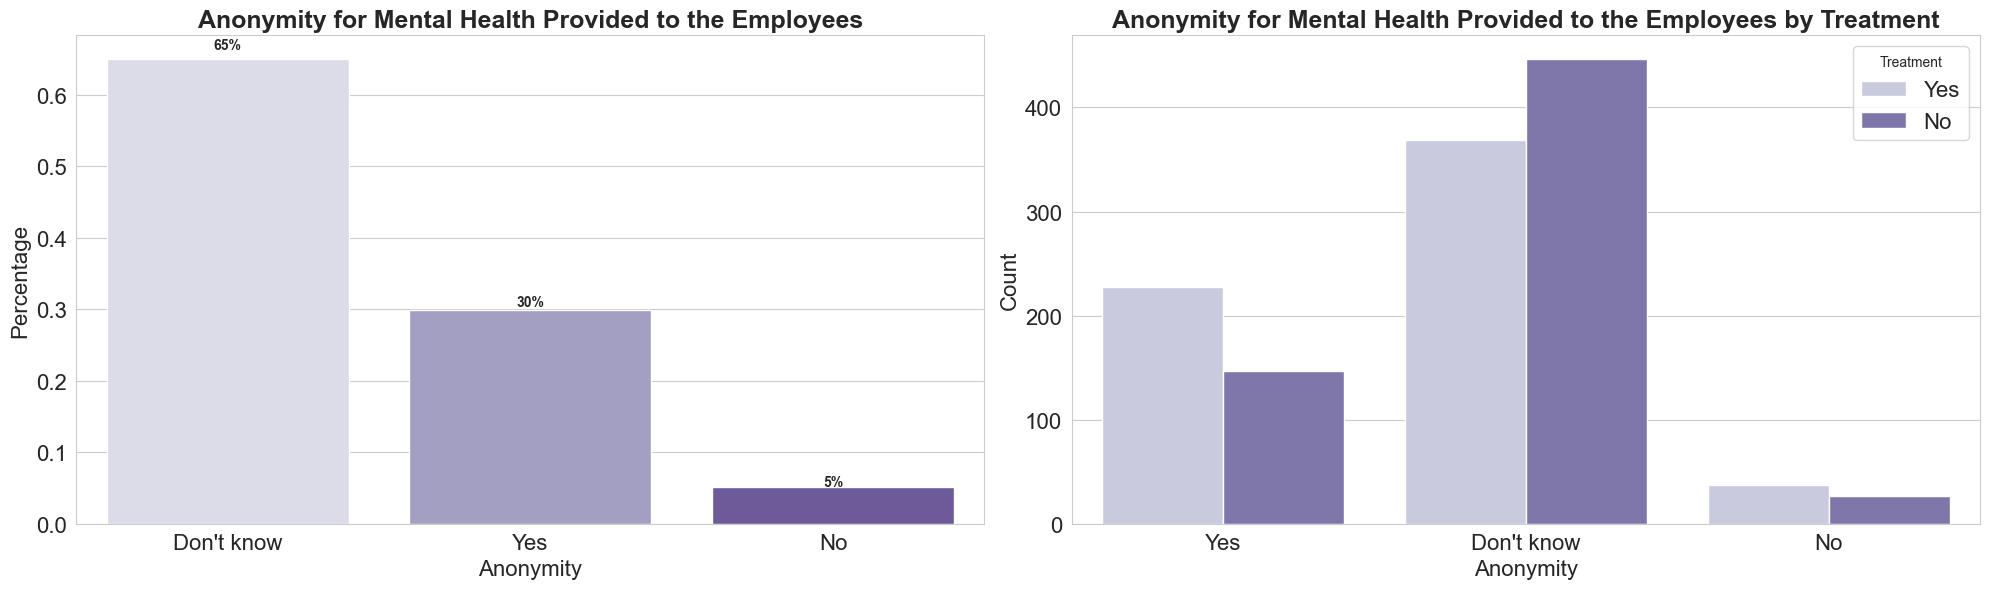

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['anonymity'].value_counts(normalize=True).rename_axis('anonymity').reset_index(name='Percentage')
ax = sns.barplot(x='anonymity', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health Provided to the Employees', fontsize=18, fontweight='bold')
plt.xlabel('Anonymity', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='anonymity', hue='treatment', data=df, palette='Purples')
plt.title('Anonymity for Mental Health Provided to the Employees by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Anonymity', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()


* Around 65% of the people were not aware whether anonymity was provided to them and 30% said yes to the provision of anonymity by the company.
* Looking at the second graph, we see that out of the people who answered yes to the provision of anonymity, around 60% of them were seeking help regarding their mental condition. Possible reasoning for this may be that the employee feels that the company has protected his/her privacy and can be trusted with knowing the mental health condition of it's workers. The most basic reason behind hiding this from the fellow workers can be the social stigma attached to mental health.


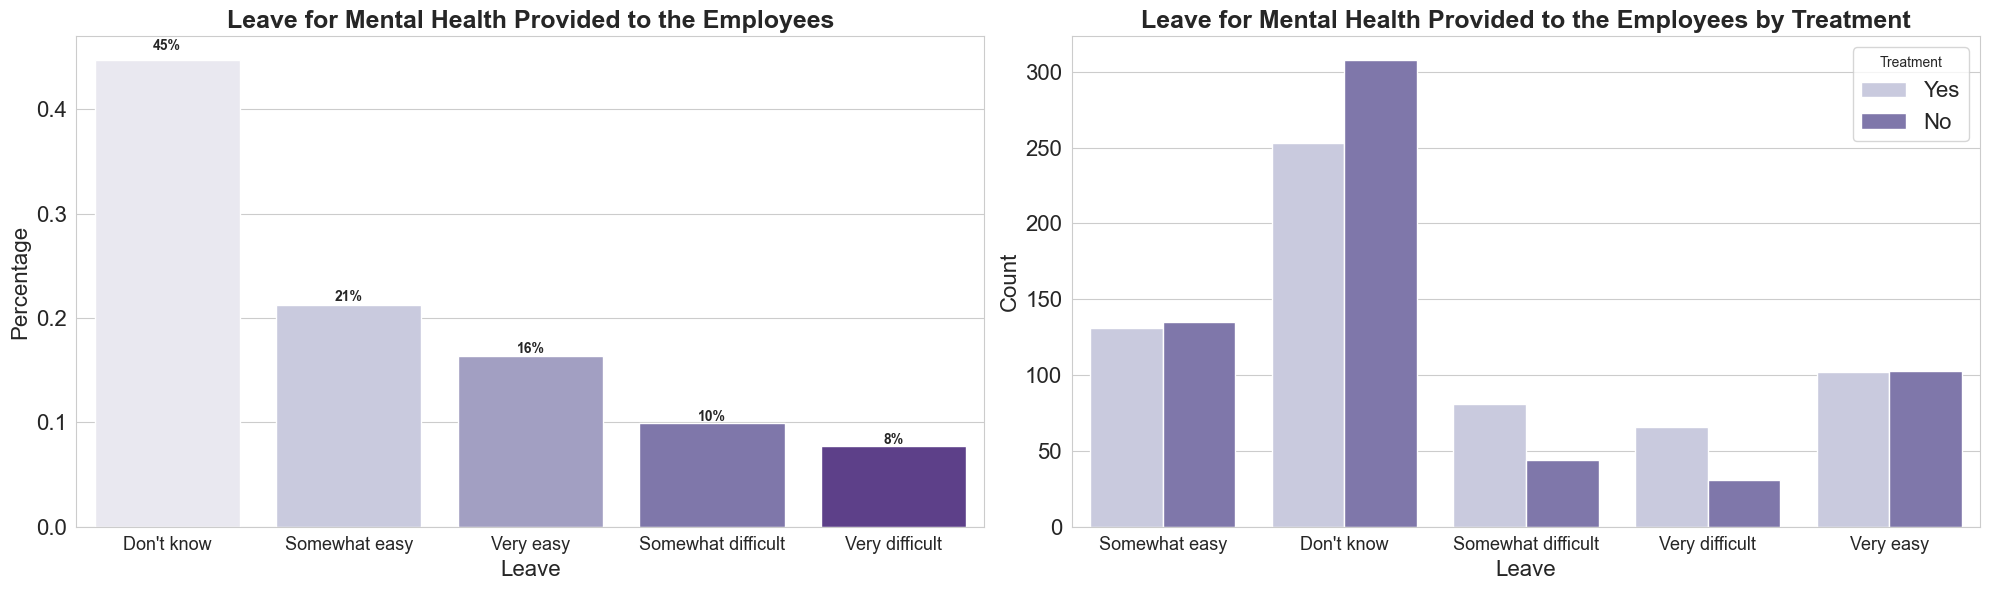

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['leave'].value_counts(normalize=True).rename_axis('leave').reset_index(name='Percentage')
ax = sns.barplot(x='leave', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Leave for Mental Health Provided to the Employees', fontsize=18, fontweight='bold')
plt.xlabel('Leave', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='leave', hue='treatment', data=df, palette='Purples')
plt.title('Leave for Mental Health Provided to the Employees by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Leave', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()


* While close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.
* A small percent of people ( around 8% ) said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.
* Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.

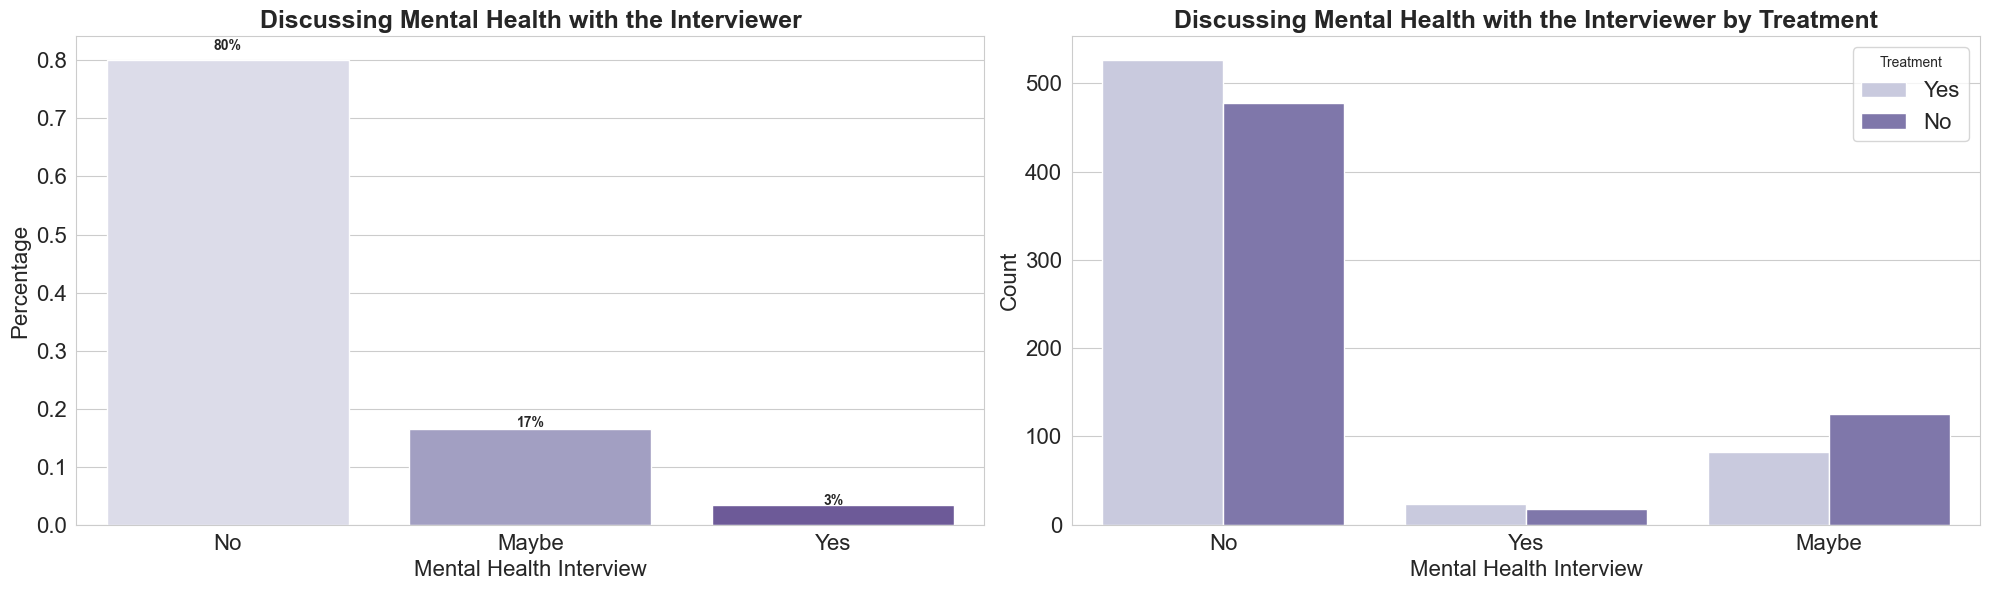

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['mental_health_interview'].value_counts(normalize=True).rename_axis('mental_health_interview').reset_index(name='Percentage')
ax = sns.barplot(x='mental_health_interview', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xlabel('Mental Health Interview', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='mental_health_interview', hue='treatment', data=df, palette='Purples')
plt.title('Discussing Mental Health with the Interviewer by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Mental Health Interview', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()


**Do you think that discussing a mental health issue with your employer would have negative consequences?**'.

* As our intution might suggest us, 80% of the respondents believe that it is a good option to discuss your mental health with the future employer. This is actually a good thing! This might not have been the case 15 years ago.
* While around 15% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it.

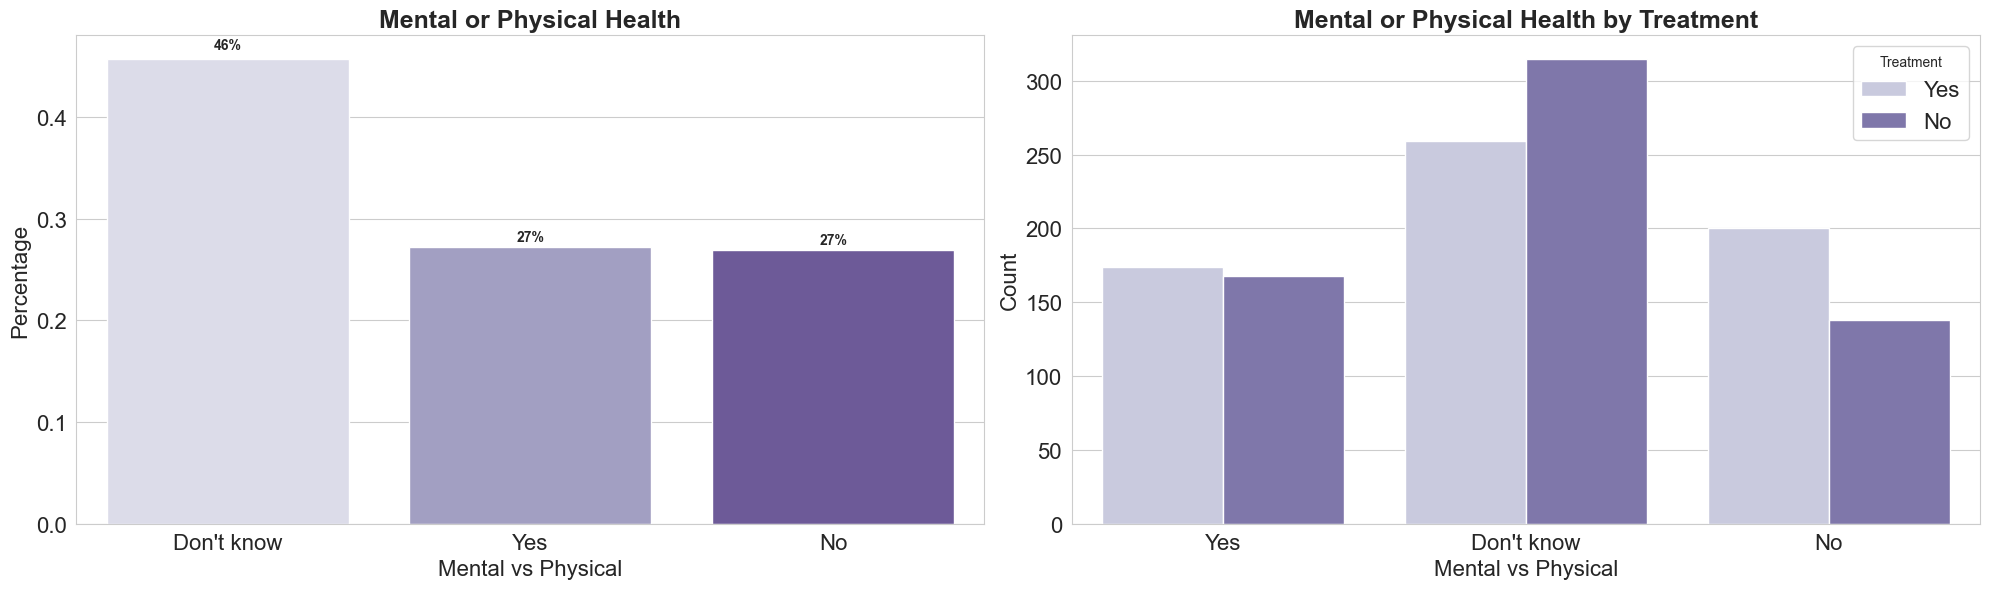

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize=True).rename_axis('mental_vs_physical').reset_index(name='Percentage')
ax = sns.barplot(x='mental_vs_physical', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xlabel('Mental vs Physical', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='mental_vs_physical', hue='treatment', data=df, palette='Purples')
plt.title('Mental or Physical Health by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Mental vs Physical', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()


* While close to 50% people said that they didn't know, the number of people who answered **Yes** as well as **No** were completely equal. 
* For the people who answered Yes as well as the ones who answered No, more than 505 of them sought after medical help for their mental health, whereas it was not the case for the one's belonging to the 'Don't know' category.

In [76]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

<Axes: >

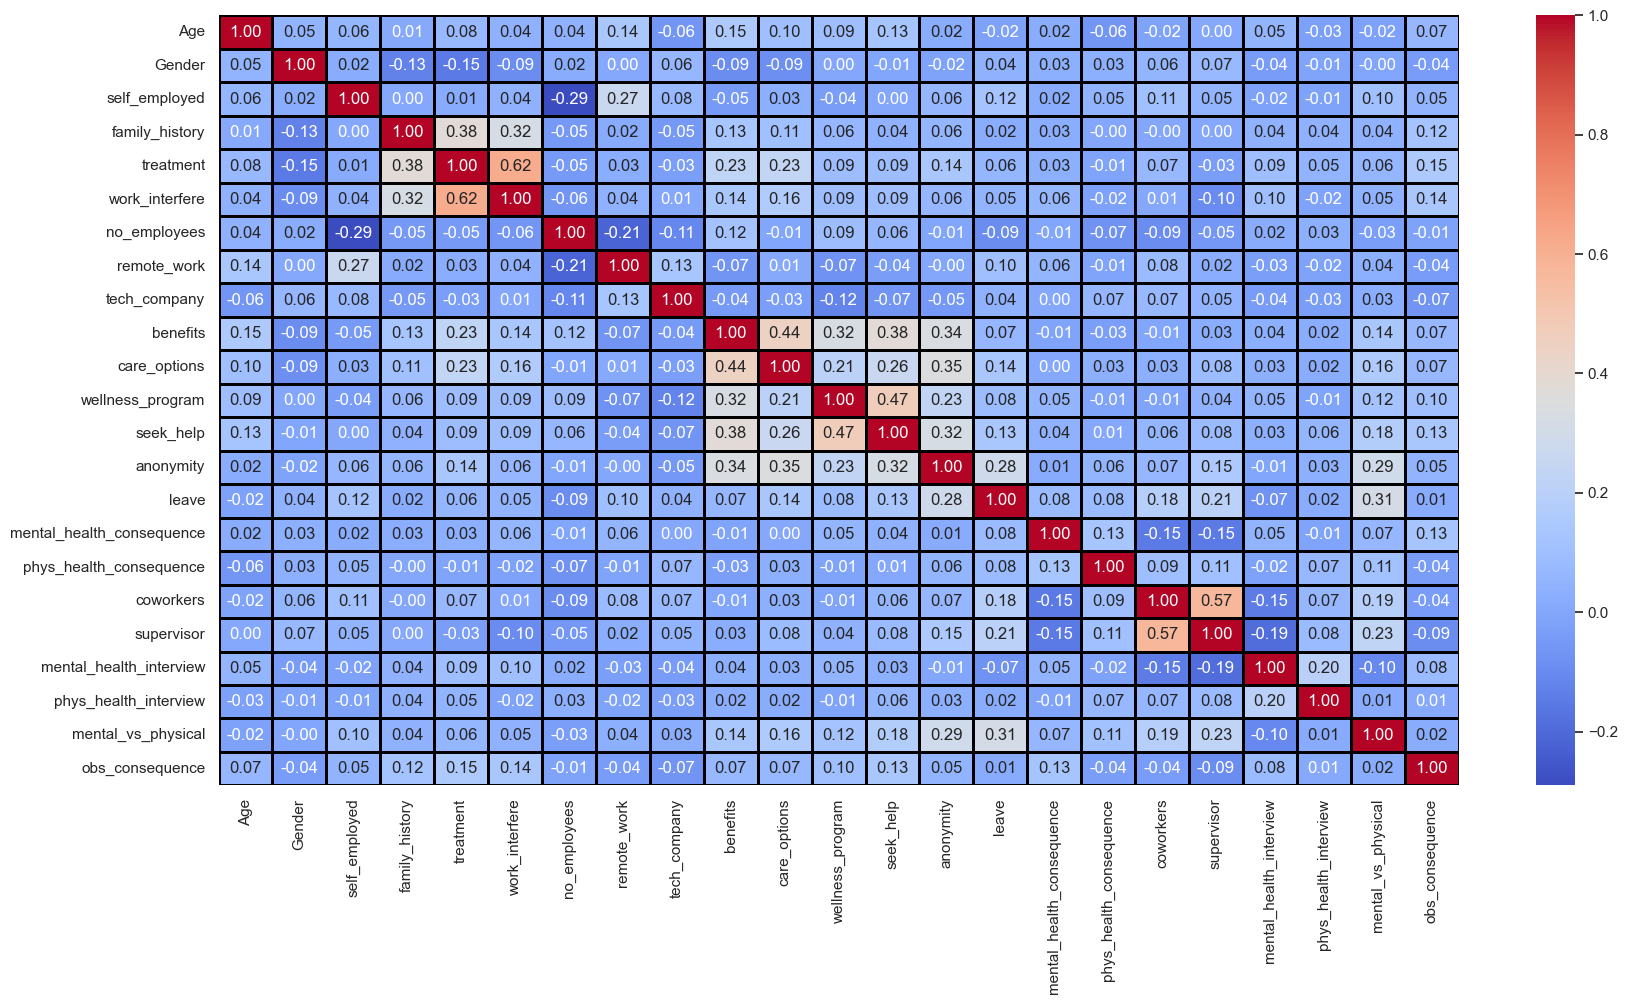

In [79]:
# Compute the correlation matrix
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.set_theme(style="white")
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=2, linecolor='black')

<h1 style = "font-family: Comic Sans MS">  Evaluating Models </h1>

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [82]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [89]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, m

In [92]:
predicted = []
model_accuracies = {}

# Ensure X_train and X_test are numpy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

for name, algo in models.items():
    model = algo
    model.fit(X_train_np, y_train_np)
    predict = model.predict(X_test_np)
    acc = accuracy_score(y_test_np, predict)
    predicted.append(acc)
    model_accuracies[name] = acc
    print(f"{name}: {acc:.4f}")



LogisticRegression: 0.8011
KNeighborsClassifier: 0.6711
DecisionTreeClassifier: 0.7401
RandomForestClassifier: 0.8090
GradientBoostingClassifier: 0.8064
AdaBoostClassifier: 0.8143
XGBClassifier: 0.8090


Text(0.5, 1.0, 'Plotting the Model Accuracies')

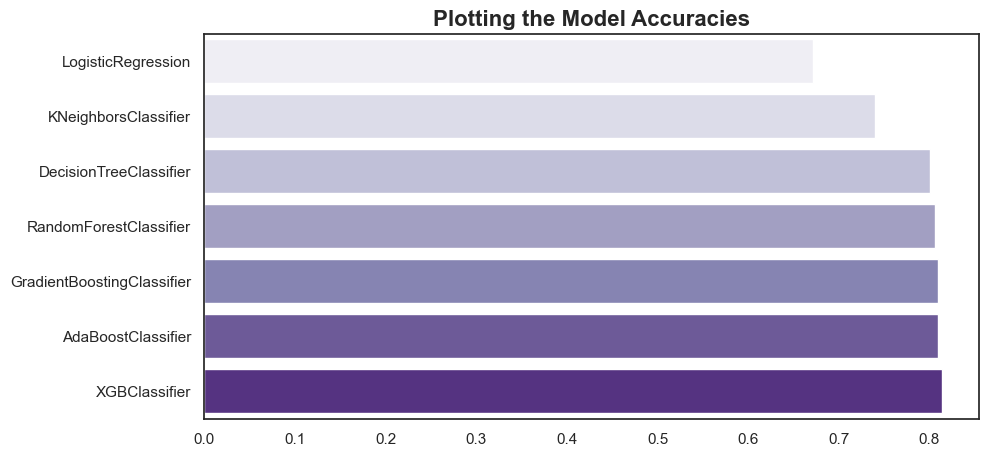

In [93]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(47.25, 0.5, 'Actual')

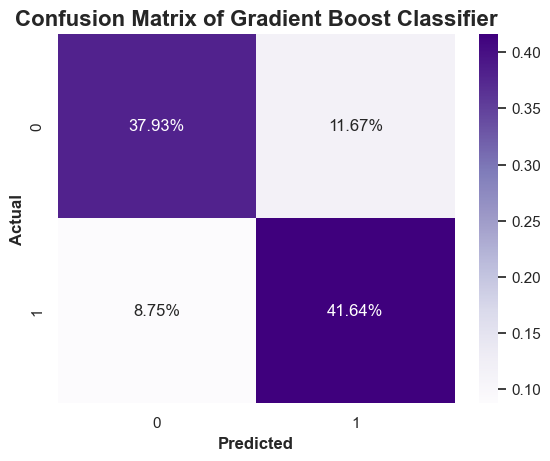

In [94]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

In [96]:
df.to_csv('cleaned_survey.csv', index=False)